In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

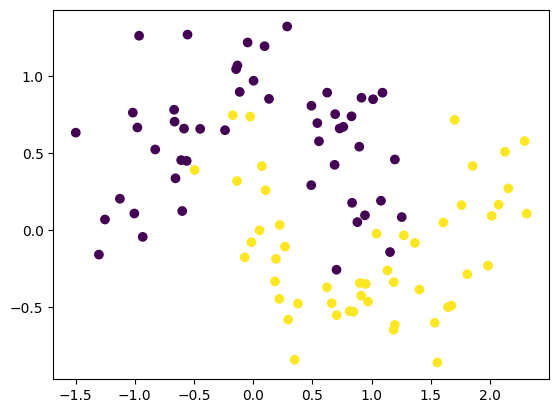

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [4]:
model = Sequential()
model.add(Dense(10,activation="relu",input_dim=2,kernel_initializer="he_normal"))
model.add(Dense(10,activation="relu",kernel_initializer="he_normal"))
model.add(Dense(10,activation="relu",kernel_initializer="he_normal"))
model.add(Dense(10,activation="relu",kernel_initializer="he_normal"))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/Users/owner/Desktop/deep-learning/deep_learning/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
initial_weights = model.get_weights()

>→ Means “random numbers from a normal (Gaussian) distribution with mean = 0 and standard >deviation = 1”.
>In short: it gives standard normal random 

In [8]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [9]:
model.set_weights(initial_weights)

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4250 - loss: 0.7062 - val_accuracy: 0.3500 - val_loss: 0.6989
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4125 - loss: 0.7034 - val_accuracy: 0.3000 - val_loss: 0.6984
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4500 - loss: 0.7010 - val_accuracy: 0.3500 - val_loss: 0.6981
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4750 - loss: 0.6989 - val_accuracy: 0.3000 - val_loss: 0.6976
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4375 - loss: 0.6967 - val_accuracy: 0.2000 - val_loss: 0.6971
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4125 - loss: 0.6950 - val_accuracy: 0.3000 - val_loss: 0.6966
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4875 - loss: 0.6929 - val_accuracy: 0.3500 - val_loss: 0.6960
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5125 - loss: 0.6911 - val_accuracy: 0.3500 - val_loss: 0.6955

In [12]:
model.get_weights()

[array([[ 0.09654278,  0.80688477,  0.55460846, -0.7706063 ,  0.01561084,
         -0.8726877 ,  0.00802639,  0.7836356 ,  0.579006  , -0.11450186],
        [ 0.9029858 , -0.27580577, -0.5571601 ,  0.29268104, -0.94669676,
         -1.3370106 ,  0.47227755, -0.42328158,  0.1294192 , -0.55258703]],
       dtype=float32),
 array([ 0.20945077,  0.22841838,  0.05200488, -0.04038543,  0.26573536,
         0.05053711,  0.17857803, -0.07275148,  0.15921135, -0.17249583],
       dtype=float32),
 array([[ 0.21658087, -0.22839664,  0.4221831 ,  0.08530115,  0.2699818 ,
         -0.50183773, -0.20291162,  0.14856774, -0.15969612,  0.04645076],
        [-0.2968333 , -0.3893993 ,  0.32328284, -0.11315392,  0.5242941 ,
         -0.33074918,  0.607732  , -0.11772769, -0.28394985,  0.50876373],
        [ 0.06978379,  0.23952088, -0.30428314,  0.1908222 , -0.20064467,
          0.30365503,  0.92631876, -0.18088917, -0.04466372, -0.14354762],
        [ 0.42038086, -0.23527053,  0.4479501 ,  0.03459046, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 162us/step


<Axes: >

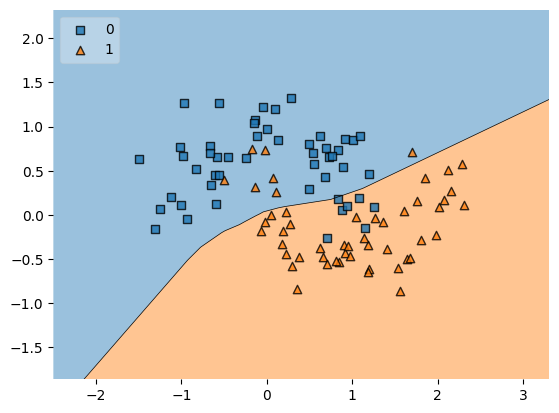

In [13]:

plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [14]:
(np.random.randn(10,10)*0.01).min()

np.float64(-0.029176526241102892)

In [15]:
(np.random.randn(10,10)*0.01).max()

np.float64(0.021152746602949295)